## Distribución de Weibull

La **distribución de Weibull** es una distribución de probabilidad continua utilizada frecuentemente en análisis de vida útil y confiabilidad. Es especialmente útil para modelar el **tiempo hasta el fallo** de un producto o sistema.

---

### 📘 Definición formal

Una variable aleatoria $X$ sigue una distribución de Weibull con **parámetro de forma** $k > 0$ y **parámetro de escala** $\lambda > 0$ si su función de densidad de probabilidad (PDF) está dada por:

$$
f(x; k, \lambda) = 
\begin{cases}
\frac{k}{\lambda} \left( \frac{x}{\lambda} \right)^{k-1} e^{-(x/\lambda)^k}, & x \ge 0 \\
0, & x < 0
\end{cases}
$$

---

### 📌 Características

- **Soporte:** $x \in [0, \infty)$
- **Media:** 
  $$
  \mathbb{E}[X] = \lambda \, \Gamma\left(1 + \frac{1}{k}\right)
  $$
- **Varianza:**
  $$
  \text{Var}(X) = \lambda^2 \left[ \Gamma\left(1 + \frac{2}{k}\right) - \left( \Gamma\left(1 + \frac{1}{k}\right) \right)^2 \right]
  $$

Donde $\Gamma(\cdot)$ es la función gamma.

---

### 🔍 Aplicaciones

- **Confiabilidad** y análisis de fallos (tiempo hasta que un producto deja de funcionar).
- Modelado de duración de eventos (ej. vida útil de componentes mecánicos o electrónicos).
- En meteorología (velocidad del viento).
- En economía (modelos de riesgo de quiebra).

---

### ⚠️ Forma según $k$:

- $k < 1$: tasa de fallo decreciente (más fallos al inicio).
- $k = 1$: equivale a una distribución exponencial.
- $k > 1$: tasa de fallo creciente (más fallos con el tiempo).


---
---
## Código para Graficar la Distribución de Weibull

Este código genera y grafica una **distribución de Weibull** con los siguientes elementos:

- **Parámetros**: $k$ (forma) y $\lambda$ (escala).
- **Cálculo y visualización** de la **media**, **varianza** y **desviación estándar**.
- **Línea roja**: Marca la **media** de la distribución.
- **Área sombreada**: Representa una desviación estándar a ambos lados de la media.

---

### Descripción del Código

1. **Parámetros de la distribución**:
   - **$k$ (forma)**: Controla la forma de la distribución de Weibull.
     - Si $k < 1$, la tasa de fallo disminuye con el tiempo.
     - Si $k = 1$, la distribución se convierte en una distribución exponencial.
     - Si $k > 1$, la tasa de fallo aumenta con el tiempo.
   - **$\lambda$ (escala)**: Escala de la distribución. Afecta la "anchura" de la distribución.

2. **Generación de datos**:
   - El código genera un rango de valores para $x$ desde 0 hasta 10, para evaluar la densidad de probabilidad de la distribución de Weibull.
   
3. **Función de Densidad de Probabilidad (PDF)**:
   - Se utiliza `weibull_min.pdf` de la librería `scipy.stats` para obtener la **función de densidad de probabilidad** (PDF) de Weibull en el rango de valores de $x$.

4. **Cálculo de la Media, Varianza y Desviación Estándar**:
   - **Media** ($\mu$): Se calcula como $ \mu = \lambda \Gamma\left(1 + \frac{1}{k}\right) $.
   - **Varianza** ($\sigma^2$): Se calcula como $ \sigma^2 = \lambda^2 \left[\Gamma\left(1 + \frac{2}{k}\right) - \left(\Gamma\left(1 + \frac{1}{k}\right)\right)^2\right] $.
   - **Desviación estándar** ($\sigma$): Es la raíz cuadrada de la varianza.

5. **Gráfico**:
   - Se usa **Matplotlib** para graficar la función de densidad de probabilidad.
   - Se dibuja una **línea roja** que marca la **media**.
   - Se sombrea el área alrededor de la media, que corresponde a una desviación estándar a ambos lados.

6. **Detalles adicionales**:
   - Se muestra la **varianza** en el gráfico como texto dentro de la figura.

---

### Resultado esperado

El gráfico mostrará la distribución de Weibull con las siguientes características:
- La **curva de densidad de probabilidad** de Weibull.
- La **media** indicada por una línea roja.
- Un área sombreada que representa la **desviación estándar** alrededor de la media.

---



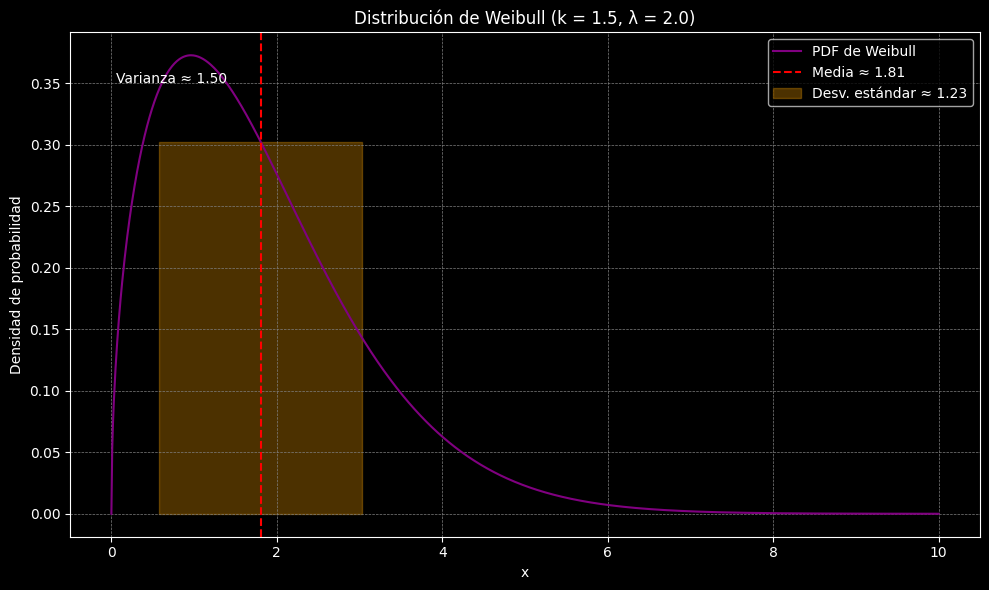

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min
from scipy.special import gamma

plt.style.use('dark_background')

# Parámetros de Weibull
k = 1.5     # forma
lam = 2.0   # escala

# Rango de x
x = np.linspace(0, 10, 1000)

# PDF de Weibull
weibull_pdf = weibull_min.pdf(x, c=k, scale=lam)

# Estadísticas
mean = lam * gamma(1 + 1/k)
var = lam**2 * (gamma(1 + 2/k) - (gamma(1 + 1/k))**2)
std = np.sqrt(var)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(x, weibull_pdf, color='purple', label='PDF de Weibull')
plt.title(f"Distribución de Weibull (k = {k}, λ = {lam})")
plt.xlabel("x")
plt.ylabel("Densidad de probabilidad")
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Línea en la media
plt.axvline(mean, color='red', linestyle='--', label=f'Media ≈ {mean:.2f}')

# Área de una desviación estándar
plt.fill_betweenx([0, weibull_min.pdf(mean, c=k, scale=lam)],
                  mean - std, mean + std,
                  color='orange', alpha=0.3, label=f'Desv. estándar ≈ {std:.2f}')

# Varianza como texto
plt.text(0.05, 0.9, f'Varianza ≈ {var:.2f}', transform=plt.gca().transAxes)

plt.legend()
plt.tight_layout()
plt.show()


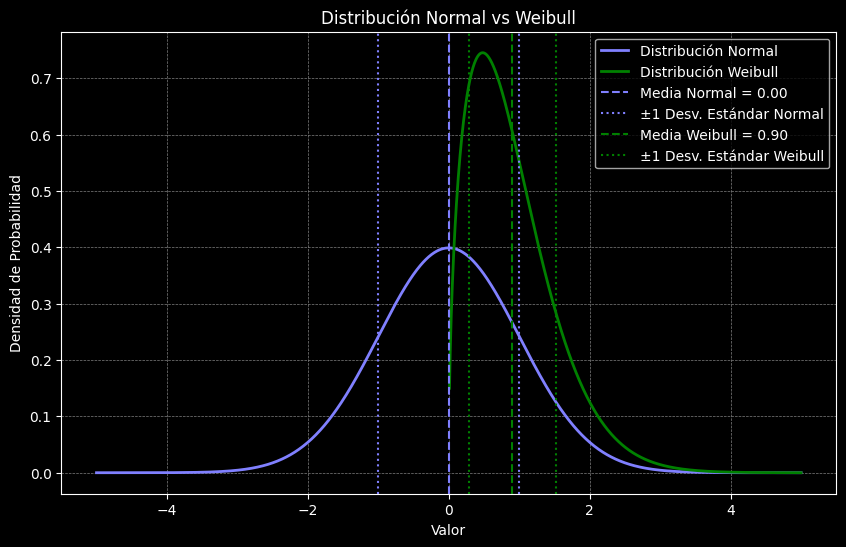

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Parámetros de las distribuciones
mu = 0       # media de la normal
sigma = 1    # desviación estándar de la normal
c = 1.5      # parámetro de forma de la Weibull

# Rango de valores para el eje x
x = np.linspace(0.01, 5, 1000)  # Weibull solo admite valores positivos
x_normal = np.linspace(-5, 5, 1000)

# Funciones de densidad de probabilidad
normal_pdf = stats.norm.pdf(x_normal, mu, sigma)
weibull_pdf = stats.weibull_min.pdf(x, c)

# Estadísticas normales
normal_mean = mu
normal_std_dev = sigma
normal_variance = sigma**2

# Estadísticas Weibull
weibull_mean = stats.weibull_min.mean(c)
weibull_variance = stats.weibull_min.var(c)
weibull_std_dev = np.sqrt(weibull_variance)

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Graficar distribuciones
plt.plot(x_normal, normal_pdf, label="Distribución Normal", color=(0.5,0.5,1.0), linewidth=2)
plt.plot(x, weibull_pdf, label="Distribución Weibull", color='green', linewidth=2)

# Líneas estadísticas para normal
plt.axvline(normal_mean, color=(0.5,0.5,1.0), linestyle='--', label=f'Media Normal = {normal_mean:.2f}')
plt.axvline(normal_mean + normal_std_dev, color=(0.5,0.5,1.0), linestyle=':', label='±1 Desv. Estándar Normal')
plt.axvline(normal_mean - normal_std_dev, color=(0.5,0.5,1.0), linestyle=':')

# Líneas estadísticas para Weibull
plt.axvline(weibull_mean, color='green', linestyle='--', label=f'Media Weibull = {weibull_mean:.2f}')
plt.axvline(weibull_mean + weibull_std_dev, color='green', linestyle=':', label='±1 Desv. Estándar Weibull')
plt.axvline(weibull_mean - weibull_std_dev, color='green', linestyle=':')

# Detalles del gráfico
plt.title('Distribución Normal vs Weibull')
plt.xlabel('Valor')
plt.ylabel('Densidad de Probabilidad')
plt.legend(loc='upper right')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()
